# **Chương 2:  Filters, Contrast, Transformation and Morphology**

In [ ]:
from skimage import data, color
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rotate, rescale
from skimage.transform import resize
from skimage import morphology

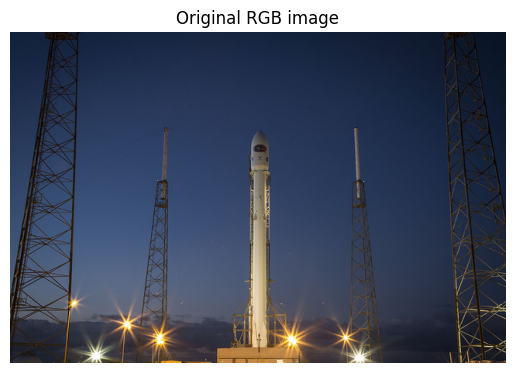

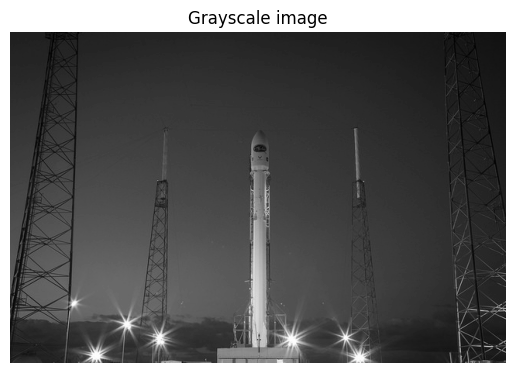

In [ ]:
# Import the modules from skimage
from skimage import data, color
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()


# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

# 4.Edge detection
In this exercise, you'll detect edges in an image by applying the Sobel filter.

Soap pills of heart and rectangle shapes in blue background
Image preloaded as soaps_image.
Theshow_image() function has been already loaded for you.

Let's see if it spots all the figures in the image.

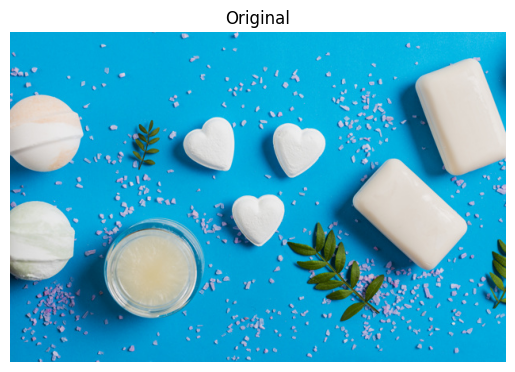

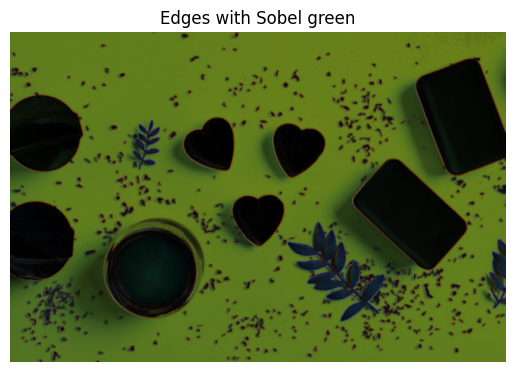

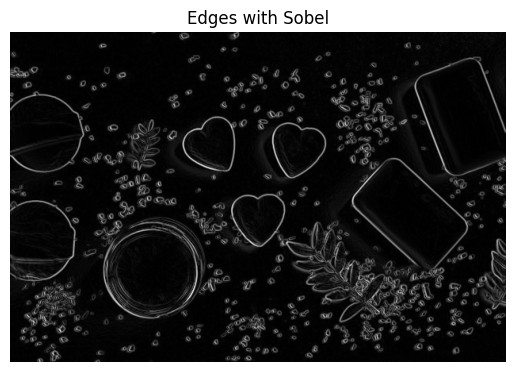

In [ ]:
# Import the color module
from skimage.filters import sobel

soaps_image = plt.imread("soaps.jpg")

# Make the image grayscale
soaps_image_gray = rgb2gray(soaps_image)

edge_sobel = sobel(soaps_image_gray)

# Apply edge detection filter
edge_sobel1 = sobel(soaps_image)
# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel1, "Edges with Sobel green")
show_image(edge_sobel, "Edges with Sobel")

# 5.Blurring to reduce noise(Làm mờ để giảm tiếng ồn)
In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.

<ipython-input-8-16b177f1a071>:7: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gaussian_image = gaussian(building_image, multichannel = True)


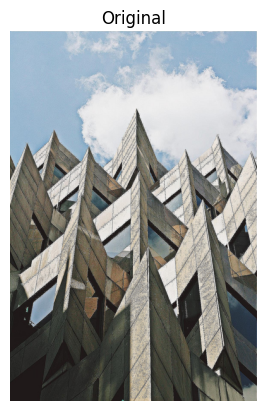

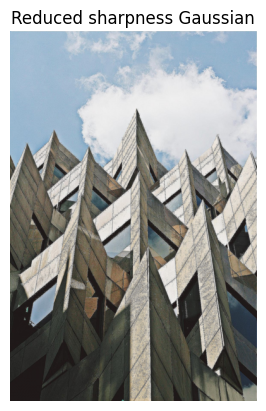

In [ ]:
# Import Gaussian filter
from skimage.filters import gaussian

building_image = plt.imread("toa-sharp-def-3.jpg")

# Apply filter
gaussian_image = gaussian(building_image, multichannel = True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

0.0


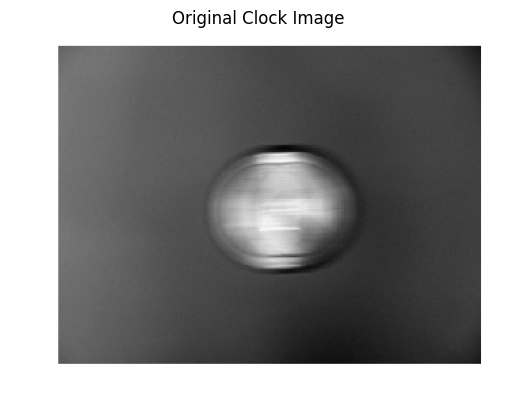

Contrast: 1.0


In [ ]:
# Assuming 'clock_image' is your grayscale image
# If not, replace 'clock_image' with the actual image data
clock_image = plt.imread('clock_image.png')

# Calculate the histogram of pixel intensities
hist, bins = np.histogram(clock_image, bins=np.arange(0, 256), density=True)

# Calculate the cumulative distribution function (CDF) of the histogram
cdf = hist.cumsum()
print(np.min(clock_image))
# Calculate the contrast by subtracting the minimum pixel intensity from the maximum
contrast = np.max(clock_image) - np.min(clock_image)


# Show the original image and display the contrast value
show_image(clock_image, "Original Clock Image")
print("Contrast:", contrast)


# 6.Medical images
You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset

$\rightarrow$ Tăng độ tương phản làm rõ các chi tiết

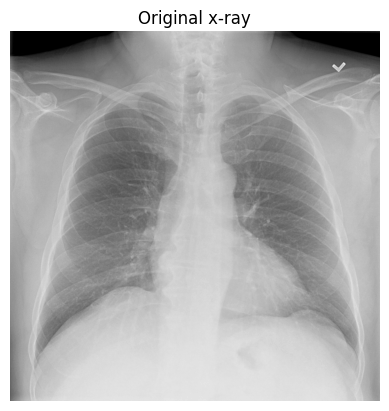

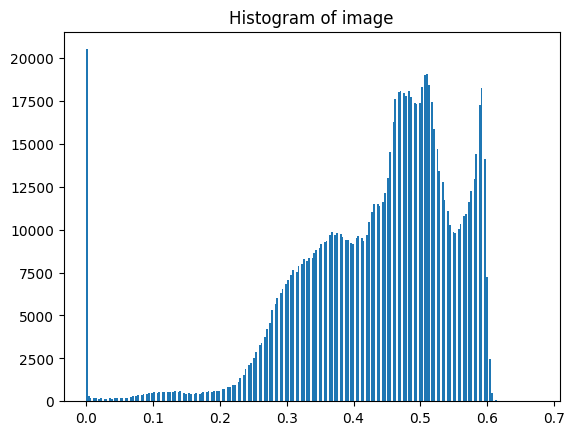

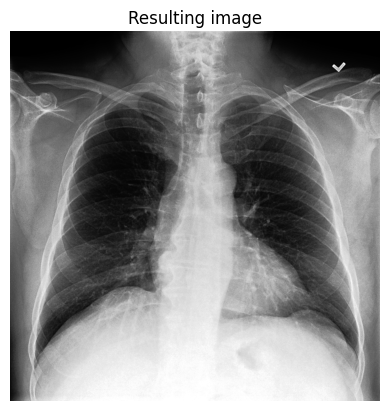

In [ ]:
from skimage import exposure

chest_xray_image = plt.imread('medical_image.png')

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)
show_image(xray_image_eq, "Resulting image")

##6.1 Aerial image
In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

thực hiện việc cân bằng histogram theo phương pháp "Adaptive Histogram Equalization" (AHE) trên ảnh image_aerial.

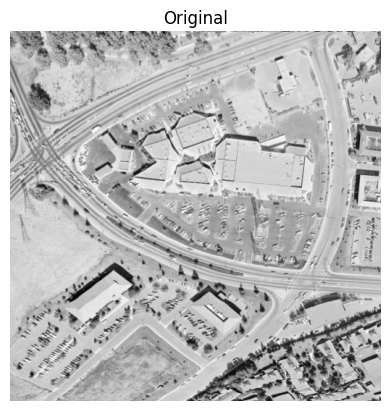

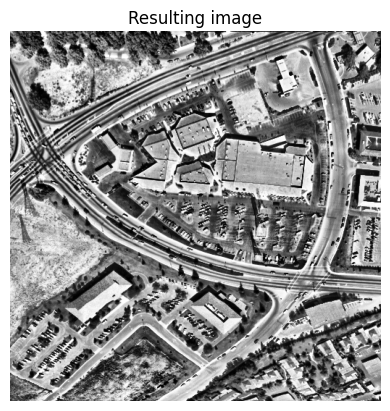

In [ ]:
# Import the required module
from skimage import exposure

image_aerial = plt.imread("map.png")

# Use histogram equalization to improve the contrast
image_eq = exposure.equalize_adapthist(image_aerial, clip_limit=0.03)


# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

## Let's add some impact and contrast

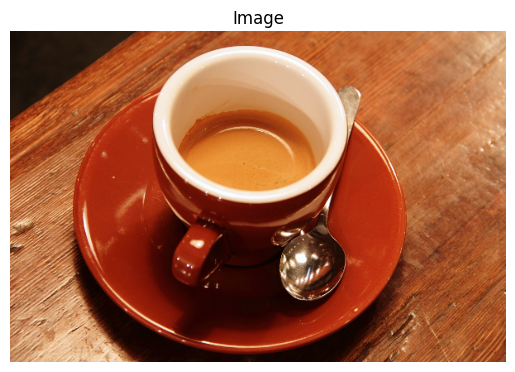

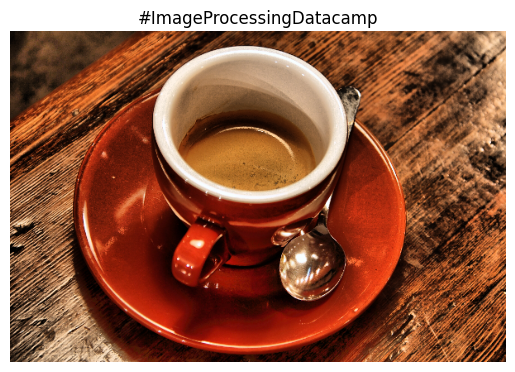

In [ ]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee() # attribute có sẵn ảnh coffee

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)


# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

# 7. Transformations

> sử dụng module transfor trong skimage để thay đổi kích thước cho nhiều ảnh, góc nghiêng,....





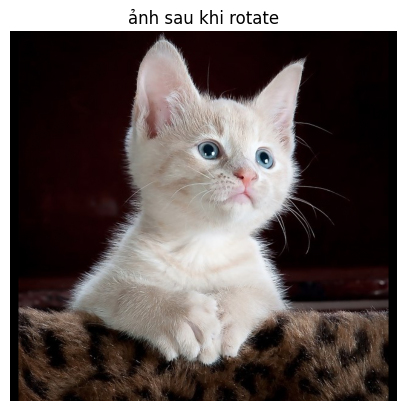

<ipython-input-13-051e72ec4bd2>:12: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)
<ipython-input-13-051e72ec4bd2>:15: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)


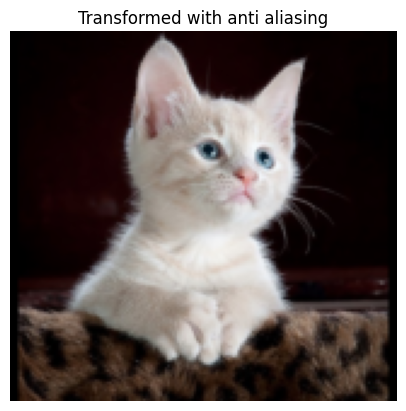

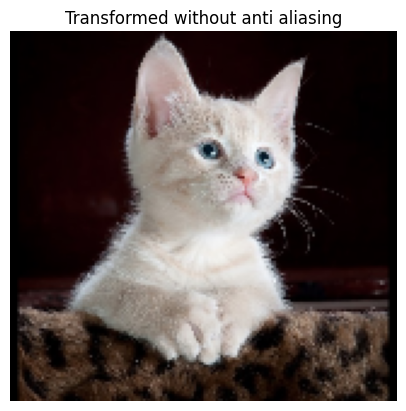

In [ ]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

image_cat = plt.imread("image_cat.jpg")

# Rotate the image 90 degrees clockwise
rotated_cat_image = rotate(image_cat, -90)

show_image(rotated_cat_image, "ảnh sau khi rotate")

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

##7.1 Enlarge image

1.   Mục danh sách
2.   Mục danh sách



<ipython-input-14-0495c4eb37a6>:11: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  enlarged_rocket_image = rescale(rocket_image, scale=3, anti_aliasing=True, multichannel=True)


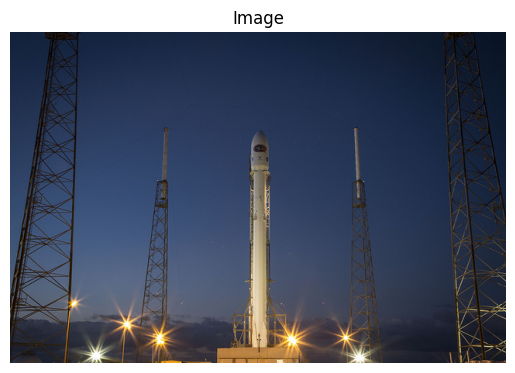

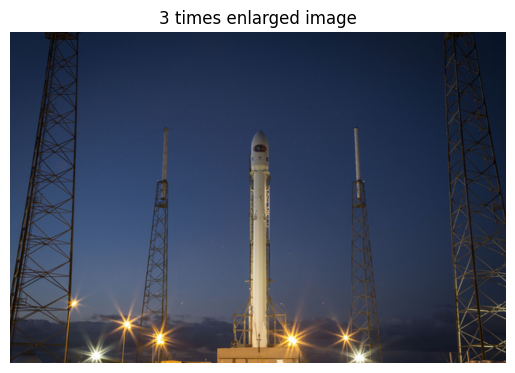

In [ ]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, scale=3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image)
show_image(enlarged_rocket_image, "3 times enlarged image")

## 7.2 Proportionally resizing

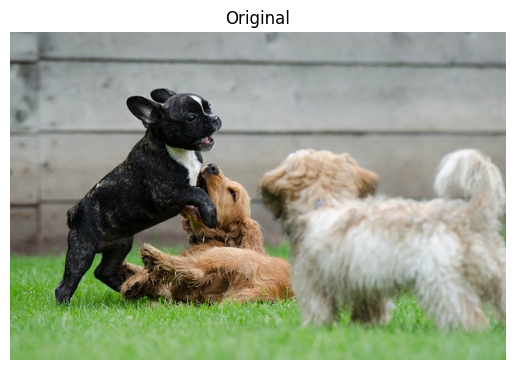

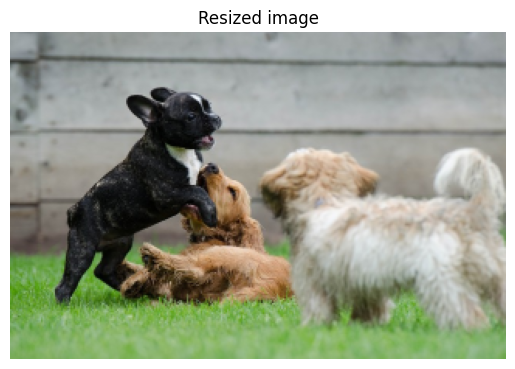

In [ ]:
# Import the module and function
from skimage.transform import resize

dogs_banner = plt.imread("dogs4.jpg")

# Set proportional height and width so they are half the size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)

# Show the original and resized image
show_image(dogs_banner, 'Original')
show_image(image_resized, 'Resized image')


# Morphology(hình thái học)

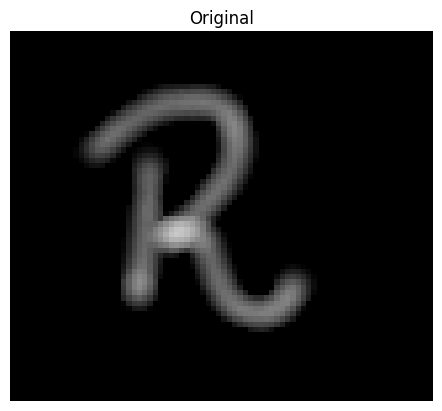

ValueError: ignored

<Figure size 640x480 with 1 Axes>

In [ ]:
from skimage import morphology

# Load the image
upper_r_image = plt.imread("r5.png")


eroded_image_shape = morphology.binary_erosion(upper_r_image)

# See results
show_image(upper_r_image, 'Original')
show_image(eroded_image_shape, 'Eroded image')

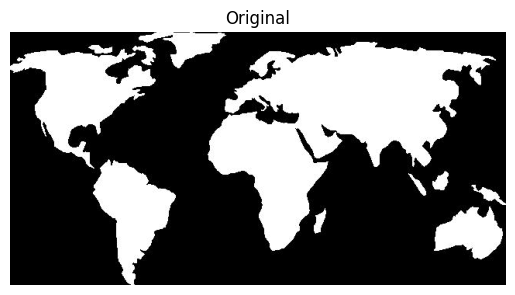

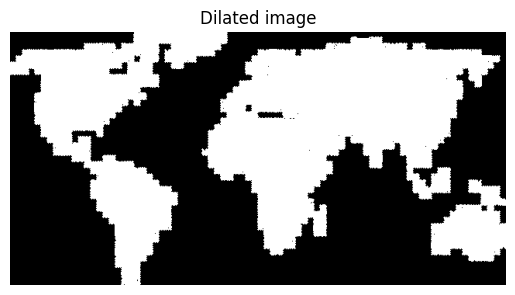

In [ ]:
# Improving thresholded image
# Import the module
from skimage import morphology

world_image = plt.imread("world_image_binary.jpg")

# Obtain the dilated image
dilated_image =  morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')